# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set

# The three models
import decision_tree
import svm_method
import random_forest_method

Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from split_data_set.ipynb
Importing Jupyter notebook from decision_tree.ipynb


In [2]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

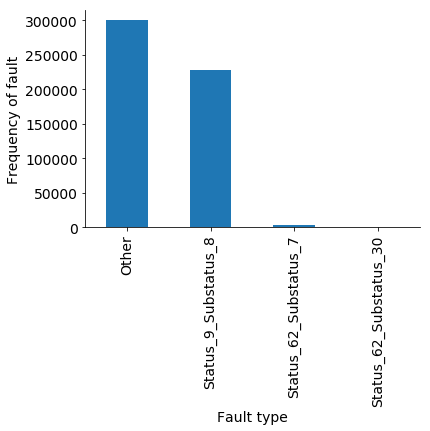

<Figure size 1440x1152 with 0 Axes>

In [3]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [4]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [5]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Status_9_Substatus_8")

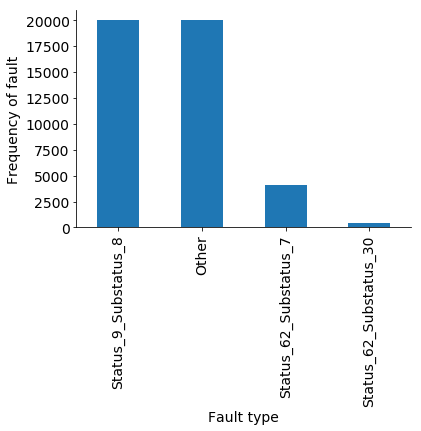

<Figure size 1440x1152 with 0 Axes>

In [6]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [7]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,09-06-2019 21:04:30,6.200000,7.8,19.049999,228.0,995.0,19.0,33.0,30.0,27.0,...,40.0,36.0,45.0,12.0,23.0,27.0,41.0,5.76,234.199997,Status_9_Substatus_8
1,27-09-2019 08:57:30,-6.700000,15.8,22.379999,158.0,2117.0,34.0,40.0,38.0,21.0,...,38.0,21.0,27.0,15.0,38.0,39.0,78.0,6.64,151.300003,Status_62_Substatus_7
2,15-04-2019 19:32:00,-0.500000,3.1,9.110000,84.0,0.0,14.0,28.0,22.0,17.0,...,17.0,27.0,21.0,7.0,14.0,19.0,26.0,1.00,83.500000,Status_9_Substatus_8
3,15-12-2018 09:56:30,-8.300000,5.6,12.050000,157.0,0.0,12.0,29.0,22.0,11.0,...,74.0,27.0,44.0,-5.0,2.0,21.0,24.0,2.07,148.699997,Status_9_Substatus_8
4,12-07-2019 15:55:30,22.300001,3.2,8.050000,0.0,42.0,17.0,24.0,23.0,21.0,...,56.0,33.0,34.0,12.0,17.0,22.0,34.0,1.00,22.300001,Status_9_Substatus_8


In [8]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(44481,)

In [9]:
y.value_counts()

Status_9_Substatus_8      20000
Other                     20000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

## Split into training and test

In [10]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [11]:
columns_for_data = X_train.columns

In [12]:
y_train.value_counts()

Status_9_Substatus_8      13400
Other                     13400
Status_62_Substatus_7      2746
Status_62_Substatus_30      256
Name: Status, dtype: int64

In [13]:
y_test.value_counts()

Other                     6600
Status_9_Substatus_8      6600
Status_62_Substatus_7     1352
Status_62_Substatus_30     127
Name: Status, dtype: int64

## Random forest and feature importance

Normalized confusion matrix
[[9.86818182e-01 0.00000000e+00 4.09090909e-03 9.09090909e-03]
 [1.81102362e-01 8.11023622e-01 0.00000000e+00 7.87401575e-03]
 [3.69822485e-03 0.00000000e+00 9.96301775e-01 0.00000000e+00]
 [1.19696970e-02 3.03030303e-04 0.00000000e+00 9.87727273e-01]]


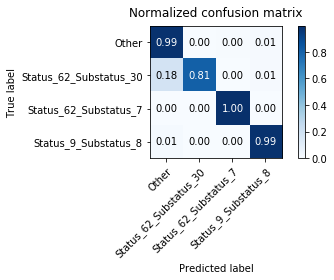

Total Accuracy 		0.987

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.984 		 0.987 		 0.985
Status_62_Substatus_30    	 0.981 		 0.811 		 0.888
Status_62_Substatus_7     	 0.980 		 0.996 		 0.988
Status_9_Substatus_8      	 0.991 		 0.988 		 0.989


In [14]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [15]:
rf.head()

,importance
ActivePower,0.146538
Log-T-Raw-Rectifier1HeatSink,0.073504
Log-T-Raw-TransformerTemperature,0.069208
Log-T-Raw-Stator2Temperature,0.057275
Log-T-Raw-Rotor2Temperature,0.055124
RotorSpeed,0.041839
Log-T-Raw-Rotor1Temperature,0.040274
Log-T-Raw-NacelleAmbientTemperature,0.036305
Log-T-Raw-Rectifier2HeatSink,0.035306
Log-T-Raw-RearBearingTemperature,0.034214


## Scale dataset for SVM

In [16]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.columns = columns_for_data
X_train_scaled_df.head()


(29802, 34)
(14679, 34)


,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.494405,0.084699,0.326750,0.910864,0.011245,0.578947,0.604651,0.311688,0.623529,0.595238,...,0.430108,0.488372,0.526316,0.372340,0.48,0.506024,0.32,0.271845,0.000000,0.926864
1,0.498135,0.644809,0.482181,0.601671,0.000000,0.473684,0.651163,0.272727,0.588235,0.607143,...,0.795699,0.825581,0.508772,0.478723,0.42,0.457831,0.26,0.242718,0.400237,0.702758
2,0.496413,0.125683,0.475741,0.919220,0.039150,0.460526,0.616279,0.311688,0.447059,0.452381,...,0.612903,0.767442,0.403509,0.276596,0.20,0.361446,0.12,0.300971,0.000000,0.934423
3,0.510187,0.478142,0.925719,0.632312,0.972095,0.723684,0.720930,0.396104,0.541176,0.583333,...,0.666667,0.627907,0.333333,0.329787,0.58,0.698795,0.58,0.757282,0.103913,0.689275
4,0.491822,0.306011,0.854873,0.306407,0.717201,0.460526,0.662791,0.370130,0.635294,0.654762,...,0.645161,0.662791,0.578947,0.478723,0.36,0.578313,0.40,0.359223,0.000000,0.481716


## SVM method

### BALANCED SVM

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.35106061 0.36424242 0.13136364 0.15333333]
 [0.08661417 0.76377953 0.09448819 0.05511811]
 [0.03106509 0.01257396 0.90236686 0.05399408]
 [0.09545455 0.25924242 0.01575758 0.62954545]]


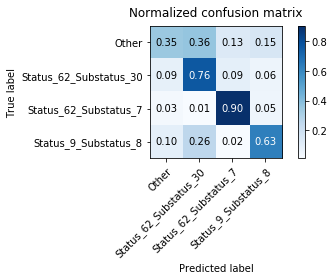

Plotting Performance Measure...
Total Accuracy 		0.531

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.772 		 0.351 		 0.483
Status_62_Substatus_30    	 0.023 		 0.764 		 0.045
Status_62_Substatus_7     	 0.554 		 0.902 		 0.686
Status_9_Substatus_8      	 0.792 		 0.630 		 0.701


In [17]:
# Balanced
svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED SVM

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.83454545 0.         0.00909091 0.15636364]
 [0.91338583 0.         0.         0.08661417]
 [0.50961538 0.         0.43639053 0.05399408]
 [0.33454545 0.         0.         0.66545455]]


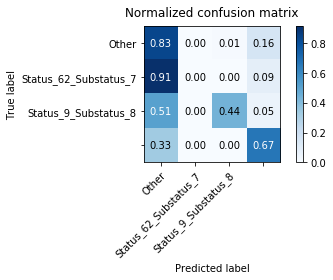

Plotting Performance Measure...
Total Accuracy 		0.715

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.646 		 0.835 		 0.729
Status_62_Substatus_7     	 0.908 		 0.436 		 0.589
Status_9_Substatus_8      	 0.797 		 0.665 		 0.725


In [18]:
# Unbalanced
svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)


X_test_scaled_smote ,y_test_smote = sm.fit_resample(X_test_scaled, y_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [ ]:
y1 = pd.DataFrame(X_train_scaled_smote)
y1[0].value_counts()

0.476327    325
0.510187    298
0.490674    293
0.505308    268
0.497561    265
           ... 
0.480102      1
0.495853      1
0.502419      1
0.500784      1
1.000000      1
Name: 0, Length: 20058, dtype: int64

### SMOTE and unbalanced weights (USE THIS RESULT Best results for 62_30)!

In [ ]:
svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

Loading...
Training...


### SMOTE and class_weight balanced

In [ ]:
print(X_train_scaled_smote.shape)
print(y_train.shape)
print(X_test_scaled_smote.shape)
print(y_test.shape)

In [ ]:
# balanced with smote and undersampling
svm4 = svm_method.get_svm_model_balanced(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

## Decision tree model

In [ ]:
# Remove the features from the random forest model called rf
rf_df = pd.DataFrame(rf)
rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()
include_features = rf_df_extracted.index
list_of_features = include_features.tolist()

# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features


In [ ]:
import numpy as np

X_train_scaled_with_names = (pd.DataFrame(X_train_scaled))
X_train_scaled_with_names.columns = columns_for_data

X_test_scaled_with_names = (pd.DataFrame(X_test_scaled))
X_test_scaled_with_names.columns = columns_for_data

# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]


X_train_scaled_removed = X_train_scaled_with_names[include_features.tolist()]
X_test_scaled_removed = X_test_scaled_with_names[include_features.tolist()]

# Printing df
X_test_scaled_removed.head()

In [ ]:
# Train DT on these features and print it out:
dt = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train, y_test)
print("depth",dt.get_depth())

In [ ]:
# Print the tree
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections


dot_data = tree.export_graphviz(dt,
                                feature_names=X_test_scaled_removed.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# colors = ('brown', 'forestgreen')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

# Exporting image to current directory
graph.write_png('tree2.png')